In [16]:
# Bibliotecas utilizadas no estudo
# Professor Odemir Depieri Jr  -- Data Viking
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pyod.utils.data import generate_data

from warnings import filterwarnings , catch_warnings

In [17]:
# Criando a base de dados
dados_x, dados_y = generate_data(n_train=1000, train_only=True, n_features=2)

eixo_x = dados_x[:,[0]].reshape(-1,1)
eixo_y = dados_x[:,[1]].reshape(-1,1)

tabela = pd.DataFrame(eixo_x, columns=['Eixo x'])
tabela['Eixo y'] = eixo_y
tabela['classe'] = dados_y

tabela.head()

,Eixo x,Eixo y,classe
0,0.958117,0.768136,0.0
1,0.885546,0.456822,0.0
2,1.580988,0.865303,0.0
3,1.213758,1.391747,0.0
4,0.951538,0.795267,0.0


In [18]:
# Verificando a distribuição das classes
tabela['classe'].value_counts( normalize=True ) * 100

classe
0.0    90.0
1.0    10.0
Name: proportion, dtype: float64

c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\U

<function matplotlib.pyplot.show(close=None, block=None)>

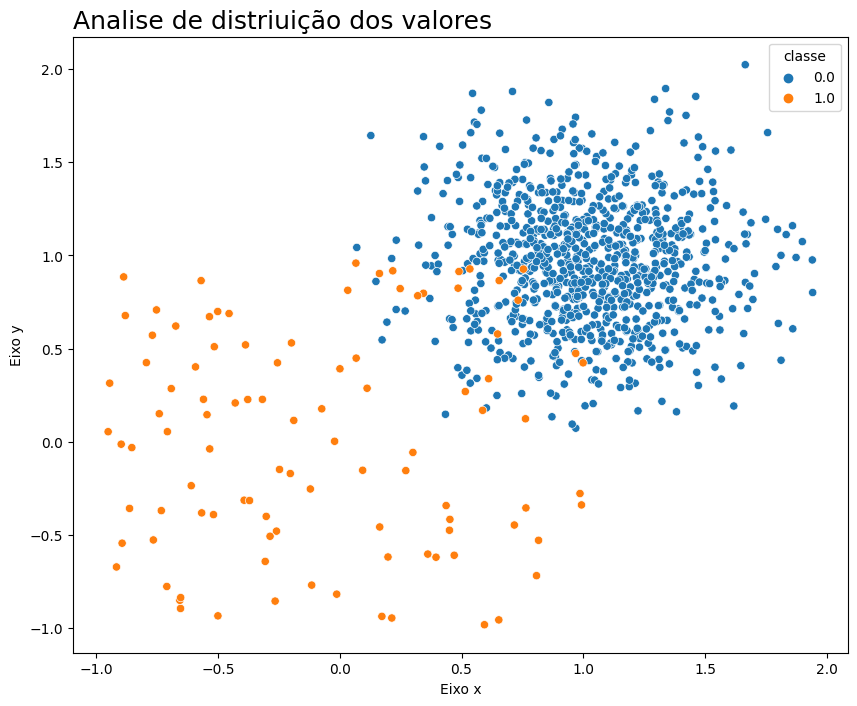

In [19]:
# Plotando a distribuição dos valores

plt.figure(figsize=(10,8))

sns.scatterplot(x='Eixo x', y='Eixo y', hue='classe', data=tabela)

plt.title('Analise de distriuição dos valores' , fontsize=18, loc = 'left')

plt.show

In [20]:
# Dados estatísticos
tabela.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Eixo x,1000.0,0.910166,0.480782,-0.950752,0.734000,0.969496,1.20338,1.941501
Eixo y,1000.0,0.875546,0.464874,-0.981594,0.662723,0.932443,1.15138,2.023618
classe,1000.0,0.100000,0.300150,0.000000,0.000000,0.000000,0.00000,1.000000


c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Análise eixo y'}, ylabel='Eixo y'>

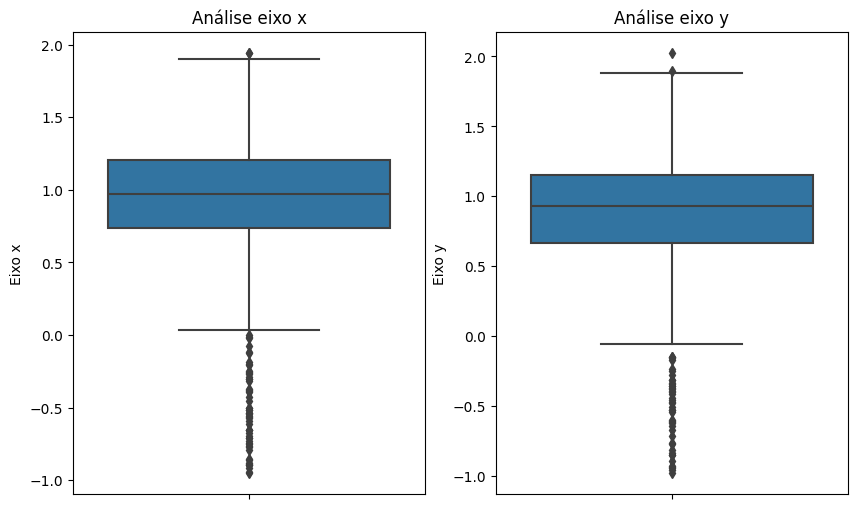

In [22]:
# Verificando a distribuição dos dados em boxplot
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('Análise eixo x')
sns.boxplot(data = tabela , y = 'Eixo x')

plt.subplot(1,2,2)
plt.title('Análise eixo y')
sns.boxplot(data = tabela , y = 'Eixo y')

In [23]:
# Calculos para extrair outliers

q1 = np.percentile( tabela['Eixo x'] , 25 , interpolation='midpoint' )
q3 = np.percentile( tabela['Eixo x'] , 75 , interpolation='midpoint' )

# Intervalo do quartil
iqr = q3 - q1

print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: 0.7334202395694649
Q3: 1.2033917790584536
IQR: 0.46997153948898873


In [24]:
# Verificando valores que precisam sair ou serem tratados
limite_superior = tabela['Eixo x'] >= q3 + 1.5 * iqr
limite_inferior = tabela['Eixo x'] <= q1 - 1.5 * iqr

print(f'Valores que são outliers:')
print(np.where(limite_superior))
print(np.where(limite_inferior))

Valores que são outliers:
(array([ 71, 776], dtype=int64),)
(array([900, 901, 902, 903, 907, 908, 909, 911, 915, 916, 917, 918, 920,
       923, 926, 927, 928, 931, 932, 937, 939, 940, 942, 943, 944, 947,
       950, 951, 952, 953, 955, 958, 959, 960, 961, 964, 965, 968, 969,
       970, 971, 972, 974, 975, 976, 977, 978, 979, 982, 983, 985, 987,
       991, 993, 994, 995, 996], dtype=int64),)


In [25]:
# Aplicação

menor = q1 - 1.5 * iqr
maior = q3 + 1.5 * iqr

dados_superior = np.where( tabela['Eixo x'] >= maior )
dados_inferior = np.where( tabela['Eixo x'] <= menor )

print(f'Serão retirados/tratados {dados_superior[0].shape} registros porque sao maiores que o q3')
print(f'Serão retirados/tratados {dados_inferior[0].shape} registros porque sao menores que o q1')

Serão retirados/tratados (2,) registros porque sao maiores que o q3
Serão retirados/tratados (57,) registros porque sao menores que o q1


In [26]:
# Criando nova base sem os outliers
nova_base = tabela.drop( dados_superior[0] )
nova_base = nova_base.drop( dados_inferior[0] )

In [27]:
print(f'Antes haviam {tabela.shape[0]} registros')
print(f'Agora há {nova_base.shape[0]} registros')
print(f'Foram retirados {tabela.shape[0] - nova_base.shape[0]} registros')

Antes haviam 1000 registros
Agora há 941 registros
Foram retirados 59 registros


c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PauloAndrade\OneDrive - Evollo\Área de Trabalho\Python\99. Aulas Pos e Me\00.Outliers\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Análise eixo y'}, ylabel='Eixo y'>

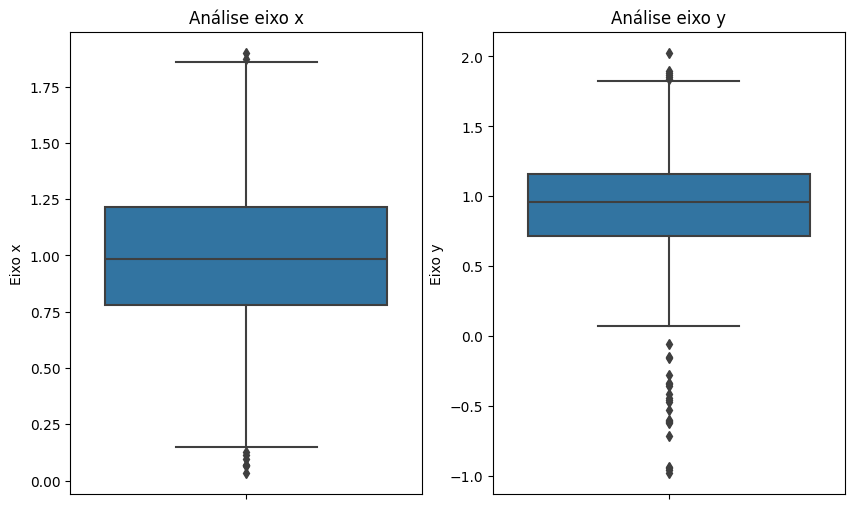

In [28]:
# Novo box plot com a nova base
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('Análise eixo x')
sns.boxplot(data = nova_base , y = 'Eixo x')

plt.subplot(1,2,2)
plt.title('Análise eixo y')
sns.boxplot(data = nova_base , y = 'Eixo y')